In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/jakarta-air-quality.csv')

In [ ]:
df

,date,pm25,pm10
0,2024/6/1,148,59
1,2024/6/3,73,57
2,2024/6/4,124,
3,2024/6/5,123,
4,2024/6/6,116,
...,...,...,...
2322,2015/9/15,,104
2323,2015/9/16,,81
2324,2015/9/17,,93
2325,2015/9/18,,86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2327 non-null   object
 1    pm25   2327 non-null   object
 2    pm10   2327 non-null   object
dtypes: object(3)
memory usage: 54.7+ KB


In [ ]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

In [ ]:
df_fix = df.copy()

In [ ]:
df_fix.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

In [ ]:
df_fix['date'] = pd.to_datetime(df_fix['date'])
df_fix['pm25'] = df_fix[' pm25'].str.strip()
df_fix['pm10'] = df_fix[' pm10'].str.strip()

In [ ]:
df_fix.drop(columns = [' pm25', ' pm10'], axis =1, inplace = True)
df_fix.head(10)

,date,pm25,pm10
0,2024-06-01,148,59
1,2024-06-03,73,57
2,2024-06-04,124,
3,2024-06-05,123,
4,2024-06-06,116,
5,2024-06-07,114,
6,2024-06-08,128,
7,2024-06-09,140,
8,2024-05-01,91,
9,2024-05-02,108,


In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2327 non-null   datetime64[ns]
 1   pm25    2327 non-null   object        
 2   pm10    2327 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 54.7+ KB


In [ ]:
df_fix['date'].sort_values()

2280   2015-07-16
2281   2015-07-17
2282   2015-07-18
2283   2015-07-19
2284   2015-07-20
          ...    
3      2024-06-05
4      2024-06-06
5      2024-06-07
6      2024-06-08
7      2024-06-09
Name: date, Length: 2327, dtype: datetime64[ns]

In [ ]:
df_fix[df_fix['pm10']=='']

,date,pm25,pm10
2,2024-06-04,124,
3,2024-06-05,123,
4,2024-06-06,116,
5,2024-06-07,114,
6,2024-06-08,128,
...,...,...,...
1510,2018-07-12,129,
1511,2018-07-13,130,
1512,2018-07-14,149,
1513,2018-07-15,88,


In [ ]:
df_fix[df_fix['pm25']=='']

,date,pm25,pm10
1611,2024-06-02,,34
1612,2024-04-17,,49
1613,2022-06-01,,38
1614,2022-01-03,,35
1615,2022-01-04,,39
...,...,...,...
2322,2015-09-15,,104
2323,2015-09-16,,81
2324,2015-09-17,,93
2325,2015-09-18,,86


In [ ]:
df_fix.replace('', np.nan, inplace=True)

In [ ]:
#Convert to numeric types
df_fix[['pm25','pm10']] = df_fix[['pm25','pm10']].astype(float)

In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2327 non-null   datetime64[ns]
 1   pm25    1611 non-null   float64       
 2   pm10    1665 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 54.7 KB


In [ ]:
df_fix.describe()

,date,pm25,pm10
count,2327,1611.000000,1665.000000
mean,2020-11-24 07:21:13.227331072,90.909994,49.834835
min,2015-07-16 00:00:00,1.000000,1.000000
25%,2019-02-26 12:00:00,62.500000,37.000000
50%,2021-02-11 00:00:00,99.000000,51.000000
75%,2022-10-31 12:00:00,122.000000,62.000000
max,2024-06-09 00:00:00,222.000000,250.000000
std,NaN,39.459768,19.223001


In [ ]:
df_fix.isna().sum()

date      0
pm25    716
pm10    662
dtype: int64

In [ ]:
df_fix['pm25'].fillna(df_fix['pm25'].median(), inplace = True)
df_fix['pm10'].fillna(df_fix['pm10'].median(), inplace = True)

In [ ]:
df_fix.isna().sum()

date    0
pm25    0
pm10    0
dtype: int64

In [ ]:
df_fix.sort_values('date')

,date,pm25,pm10
2280,2015-07-16,99.0,62.0
2281,2015-07-17,99.0,63.0
2282,2015-07-18,99.0,60.0
2283,2015-07-19,99.0,60.0
2284,2015-07-20,99.0,59.0
...,...,...,...
3,2024-06-05,123.0,51.0
4,2024-06-06,116.0,51.0
5,2024-06-07,114.0,51.0
6,2024-06-08,128.0,51.0


In [ ]:
df_fix.describe()

,date,pm25,pm10
count,2327,2327.000000,2327.000000
mean,2020-11-24 07:21:13.227331072,93.399226,50.166309
min,2015-07-16 00:00:00,1.000000,1.000000
25%,2019-02-26 12:00:00,79.000000,43.000000
50%,2021-02-11 00:00:00,99.000000,51.000000
75%,2022-10-31 12:00:00,112.000000,58.000000
max,2024-06-09 00:00:00,222.000000,250.000000
std,NaN,33.041117,16.267469


Text(0.5, 1.0, 'Distribution of pm10')

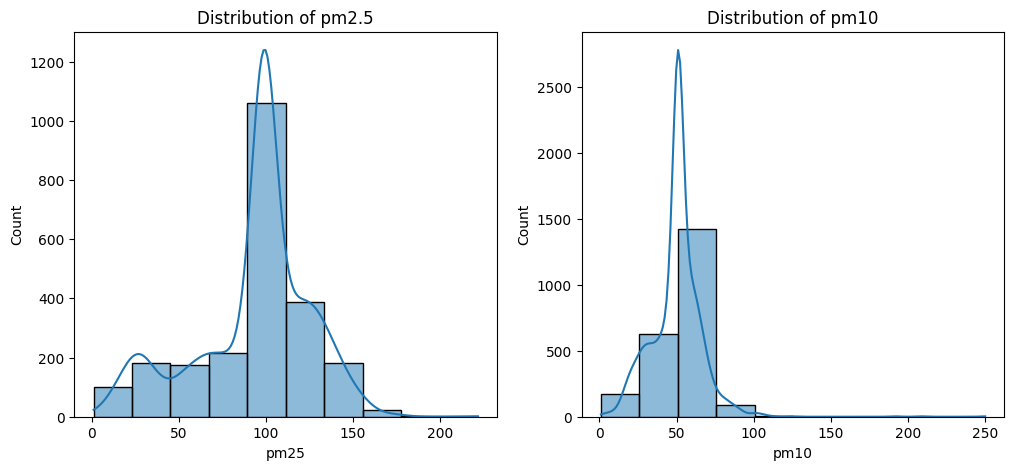

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_fix['pm25'], bins=10, kde=True)
plt.title('Distribution of pm2.5')

plt.subplot(1, 2, 2)
sns.histplot(df_fix['pm10'], bins=10, kde=True)
plt.title('Distribution of pm10')

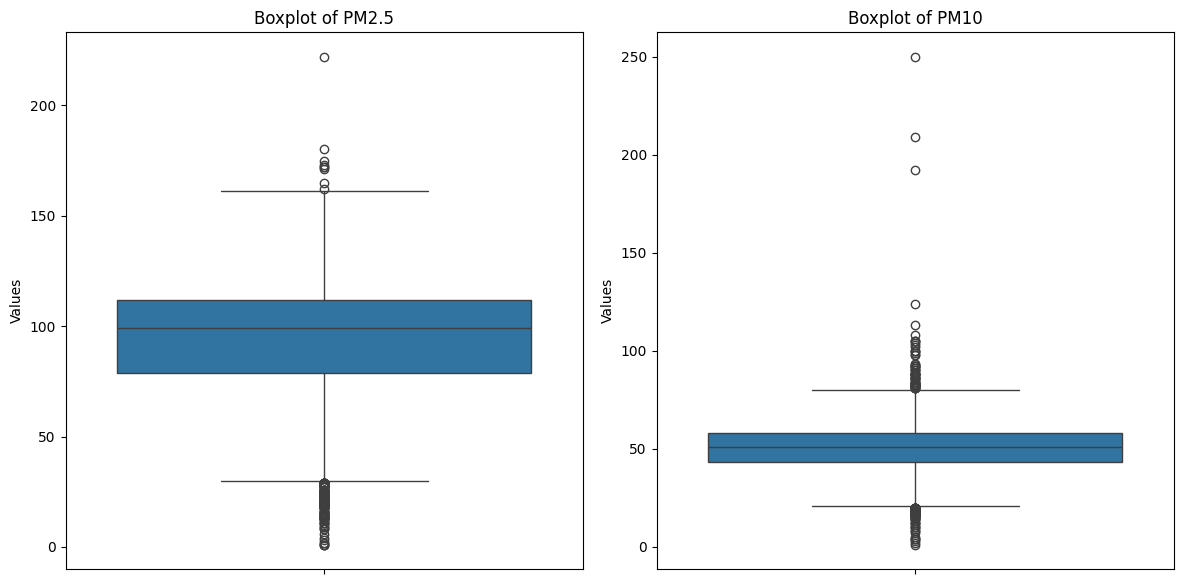

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set(style="whitegrid")  # Optional: Set a prettier style

# Boxplot for Feature 1
sns.boxplot(data=df_fix['pm25'], ax=axes[0])
axes[0].set_title("Boxplot of PM2.5")
axes[0].set_ylabel("Values")

# Boxplot for Feature 2
sns.boxplot(data=df_fix['pm10'], ax=axes[1])
axes[1].set_title("Boxplot of PM10")
axes[1].set_ylabel("Values")

plt.tight_layout()  # To prevent overlap
plt.show()

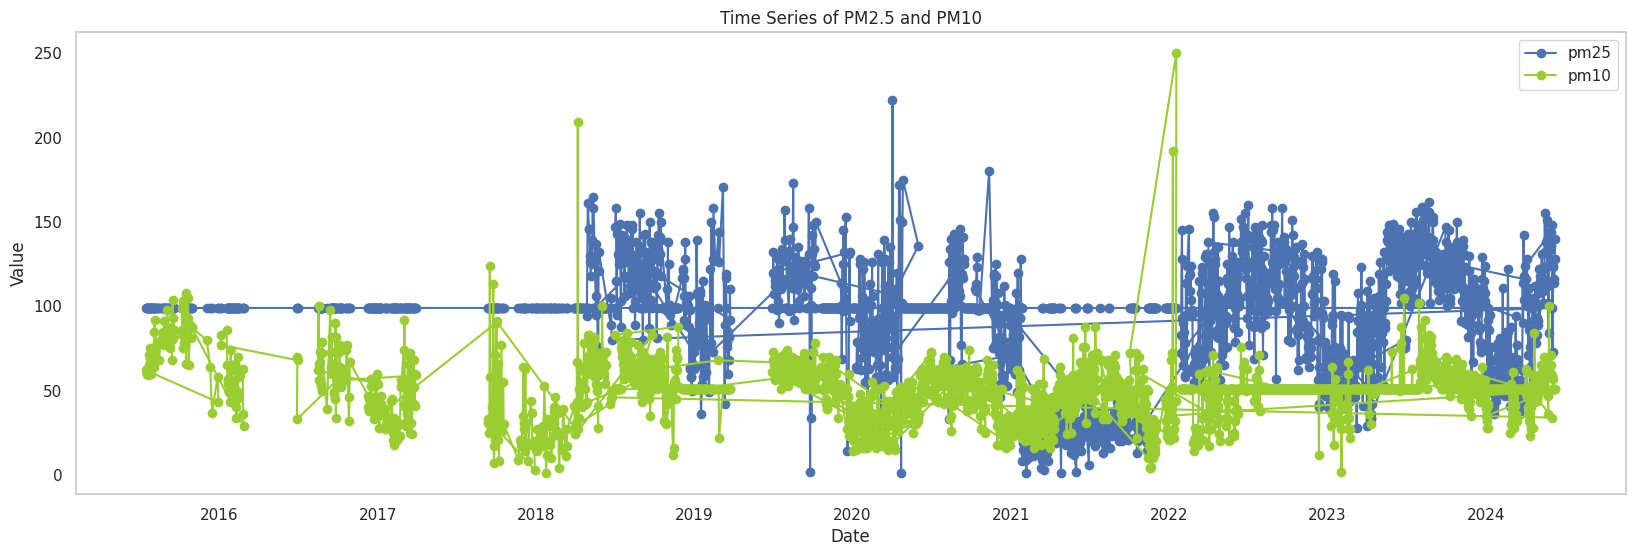

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(df_fix['date'], df_fix['pm25'], label='pm25', marker='o')
plt.plot(df_fix['date'], df_fix['pm10'], label='pm10', marker='o', c = 'yellowgreen')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of PM2.5 and PM10')
plt.legend()
plt.grid()

plt.show()

In [ ]:
df_fix1 = df_fix.copy()
df_fix1.set_index('date', inplace=True)

# Resample and calculate monthly averages
monthly_averages = df_fix1.resample('M').mean()

In [ ]:
monthly_averages

,pm25,pm10
date,,
2015-07-31,99.000000,65.750000
2015-08-31,99.000000,78.666667
2015-09-30,99.000000,84.500000
2015-10-31,99.000000,87.894737
2015-11-30,NaN,NaN
...,...,...
2024-02-29,67.896552,49.517241
2024-03-31,66.586207,47.620690
2024-04-30,89.933333,45.866667


In [ ]:
monthly_averages['pm25'].fillna(monthly_averages['pm25'].median(), inplace = True)
monthly_averages['pm10'].fillna(monthly_averages['pm10'].median(), inplace = True)

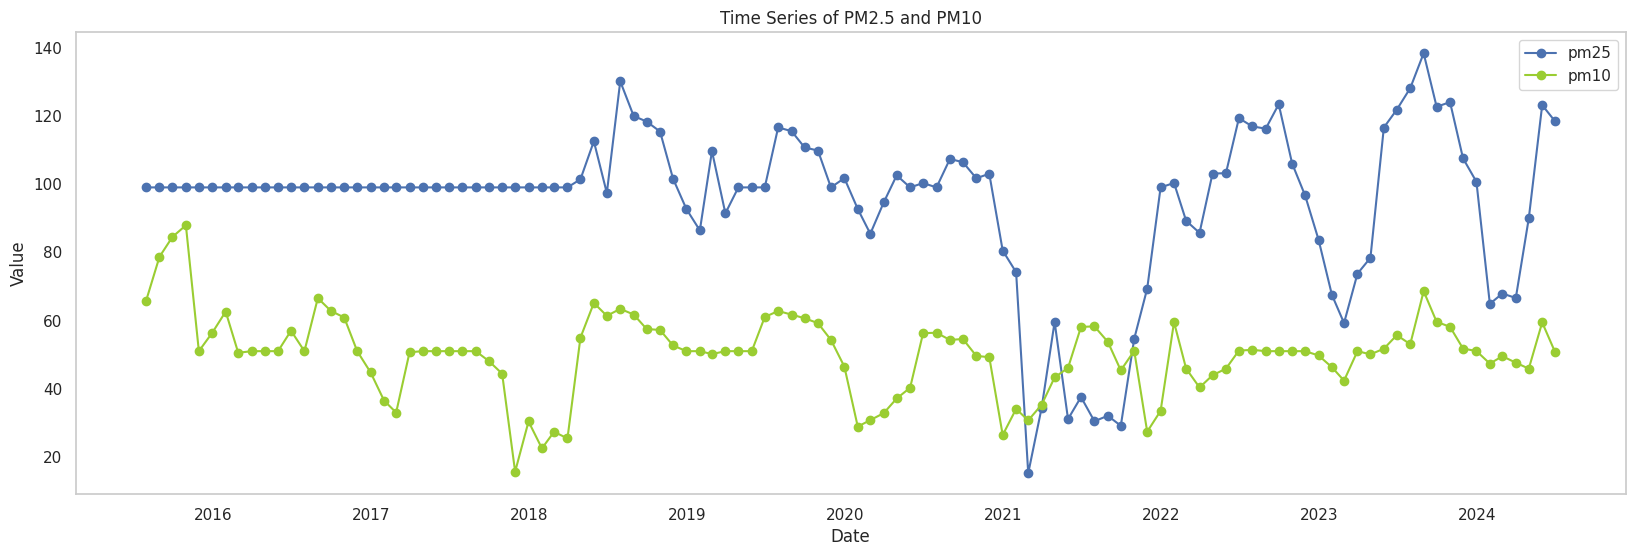

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(monthly_averages.index, monthly_averages['pm25'], label='pm25', marker='o')
plt.plot(monthly_averages.index, monthly_averages['pm10'], label='pm10', marker='o', color = 'yellowgreen')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of PM2.5 and PM10')
plt.legend()
plt.grid()

plt.show()
# In this example, we first convert the 'date' column to a datetime format and set it as the DataFrame index. Then, we use plt.plot() to create line plots for both 'pm25' and 'pm10' columns against the date index. The marker='o' argument adds markers at the data points, and plt.legend() adds a legend to differentiate between the two lines.


In [ ]:
ma_2019 = df_fix[df_fix['date'] >= '2019-01-01']
ma_2019.sort_values

<bound method DataFrame.sort_values of            date   pm25  pm10
0    2024-06-01  148.0  59.0
1    2024-06-03   73.0  57.0
2    2024-06-04  124.0  51.0
3    2024-06-05  123.0  51.0
4    2024-06-06  116.0  51.0
...         ...    ...   ...
1939 2019-08-18   99.0  68.0
1940 2019-08-31   99.0  61.0
1941 2019-09-15   99.0  56.0
1942 2019-09-21   99.0  66.0
1943 2019-02-25   99.0  68.0

[1783 rows x 3 columns]>

In [ ]:
ma_2019.tail(5)

,date,pm25,pm10
1939,2019-08-18,99.0,68.0
1940,2019-08-31,99.0,61.0
1941,2019-09-15,99.0,56.0
1942,2019-09-21,99.0,66.0
1943,2019-02-25,99.0,68.0


In [ ]:
ma_2019.set_index('date', inplace=True)

ma_2019 = ma_2019.resample('M').mean()

In [ ]:
ma_2019

,pm25,pm10
date,,
2019-01-31,86.400000,51.000000
2019-02-28,109.642857,50.142857
2019-03-31,91.400000,51.000000
2019-04-30,NaN,NaN
2019-05-31,NaN,NaN
...,...,...
2024-02-29,67.896552,49.517241
2024-03-31,66.586207,47.620690
2024-04-30,89.933333,45.866667


In [ ]:
ma_2019['pm25'].fillna(ma_2019['pm25'].median(), inplace = True)
ma_2019['pm10'].fillna(ma_2019['pm10'].median(), inplace = True)

In [ ]:
ma_2019.describe()

,pm25,pm10
count,66.000000,66.000000
mean,90.748012,48.871330
std,27.913843,9.180421
min,15.214286,26.419355
25%,75.212634,45.867742
50%,99.000000,51.000000
75%,109.115476,54.297581
max,138.322581,68.580645


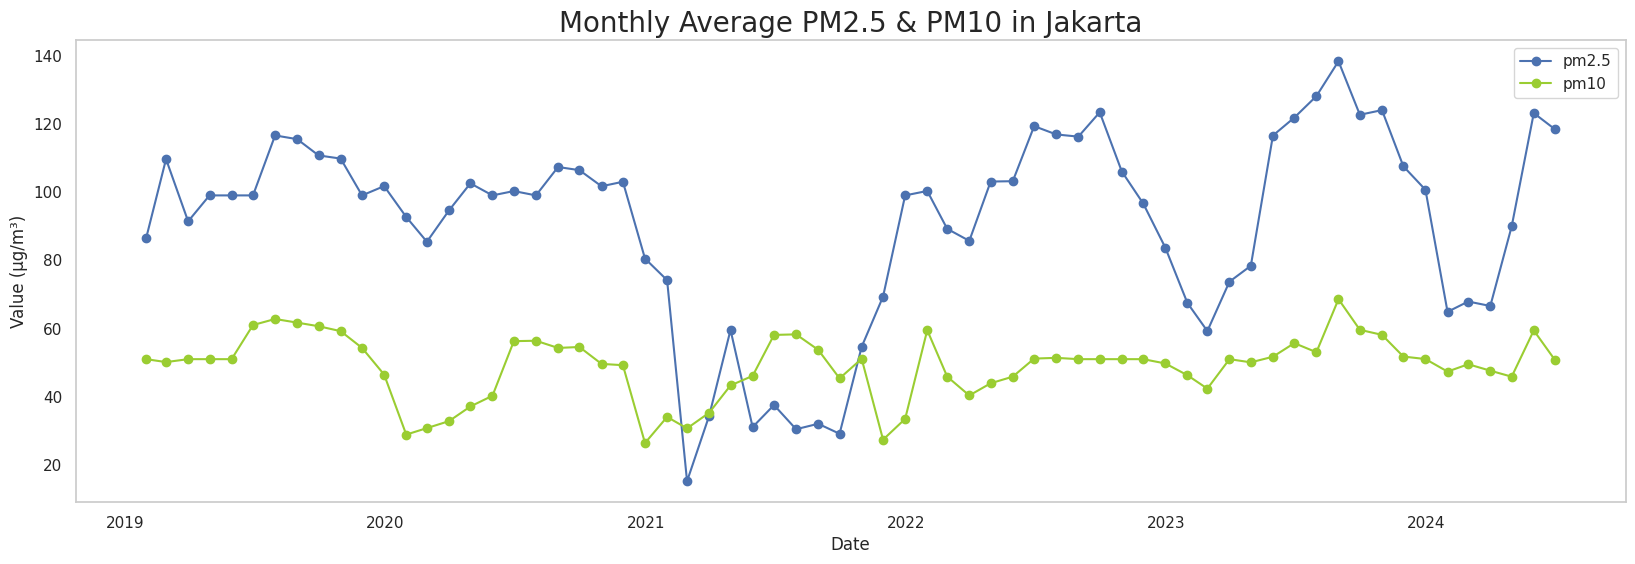

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(ma_2019.index, ma_2019['pm25'], label='pm2.5', marker='o')
plt.plot(ma_2019.index, ma_2019['pm10'], label='pm10', marker='o', c = 'yellowgreen')
# plt.axhline(y=15, color='r', linestyle='--', label='WHO')
# plt.axhline(y=55, color='purple', linestyle='--', label='PP No. 22/2021')

plt.xlabel('Date')
plt.ylabel("Value (\u00B5g/m³)")
plt.title('Monthly Average PM2.5 & PM10 in Jakarta', size =20)
plt.legend()
plt.grid()

plt.show()

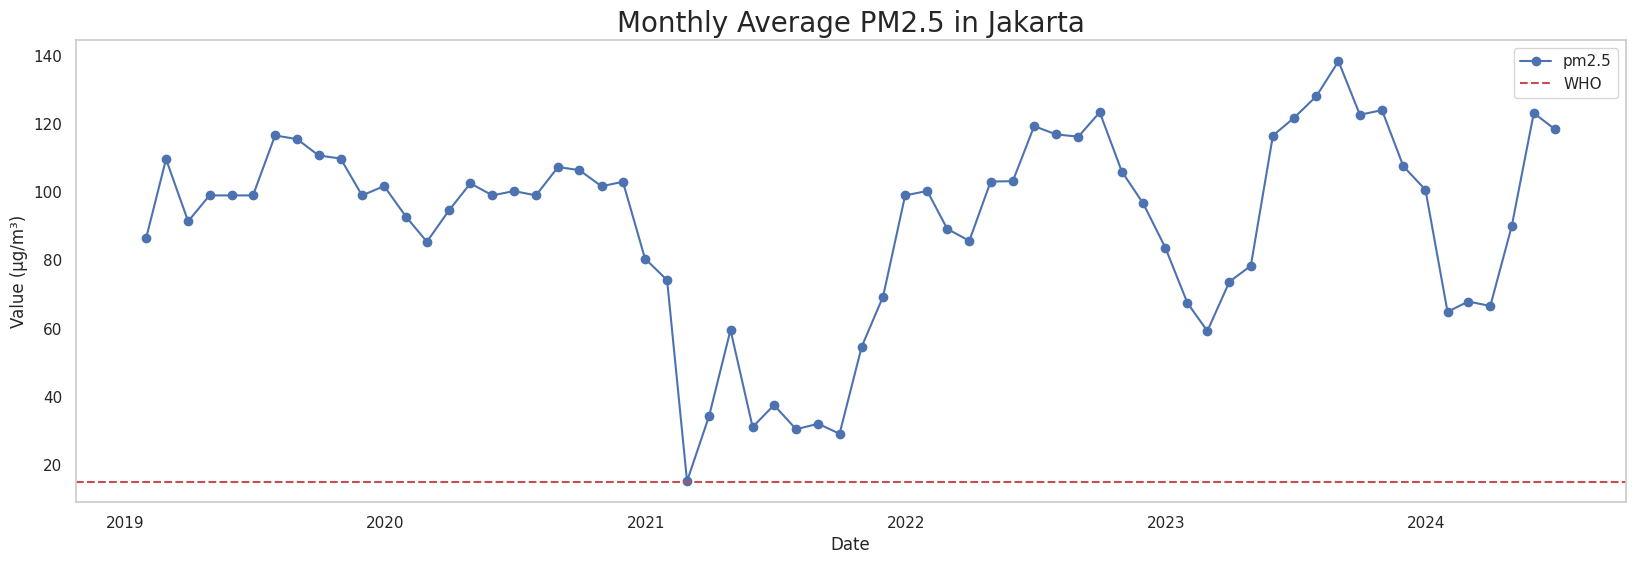

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(ma_2019.index, ma_2019['pm25'], label='pm2.5', marker='o')
# plt.plot(ma_2019.index, ma_2019['pm10'], label='pm10', marker='o')
plt.axhline(y=15, color='r', linestyle='--', label='WHO')
# plt.axhline(y=55, color='limegreen', linestyle='--', label='PP No. 22/2021')

plt.xlabel('Date')
plt.ylabel("Value (\u00B5g/m³)")
plt.title('Monthly Average PM2.5 in Jakarta', size = 20)
plt.legend()
plt.grid()

plt.show()


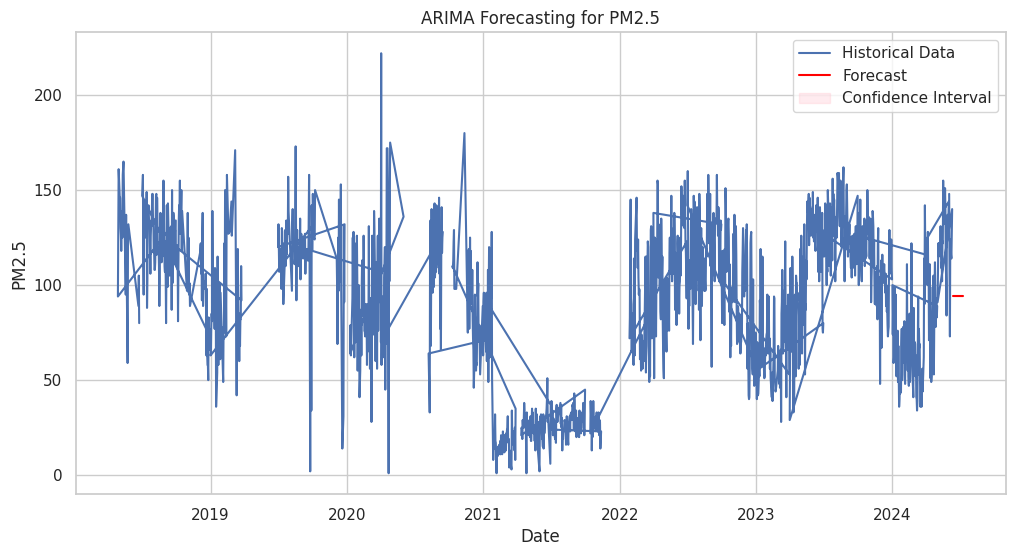

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Reset index
df.reset_index(drop=True, inplace=True)

# Fit ARIMA model
model = ARIMA(df['pm25'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
forecast_steps = 30
predictions = model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=forecast_steps)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pm25'], label='Historical Data')
plt.plot(forecast_dates, predictions, label='Forecast', color='red')
plt.fill_between(forecast_dates, predictions - 1.96 * np.std(predictions), predictions + 1.96 * np.std(predictions), color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('ARIMA Forecasting for PM2.5')
plt.legend()
plt.show()


Fitting 2 folds for each of 32 candidates, totalling 64 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error (MSE): 348.1937253922338
Mean Absolute Error (MAE): 11.724105102038555
R-squared Score: 0.6506343949376108


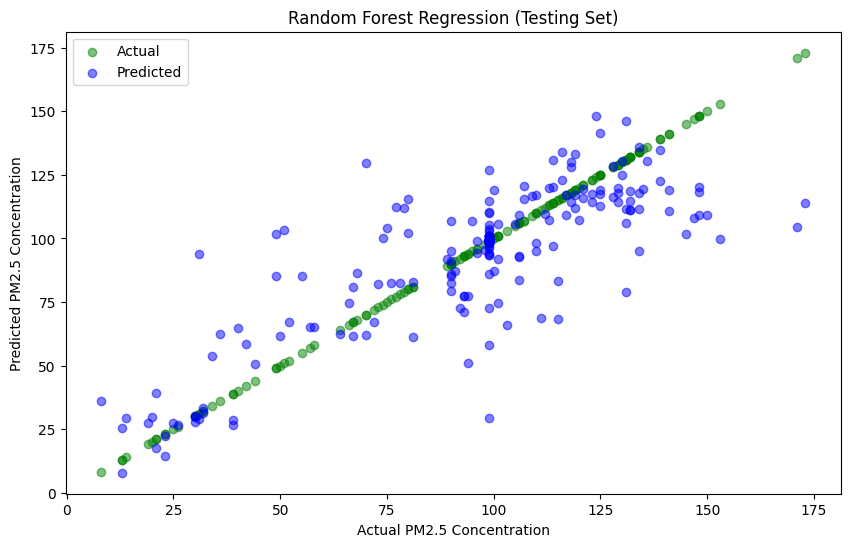

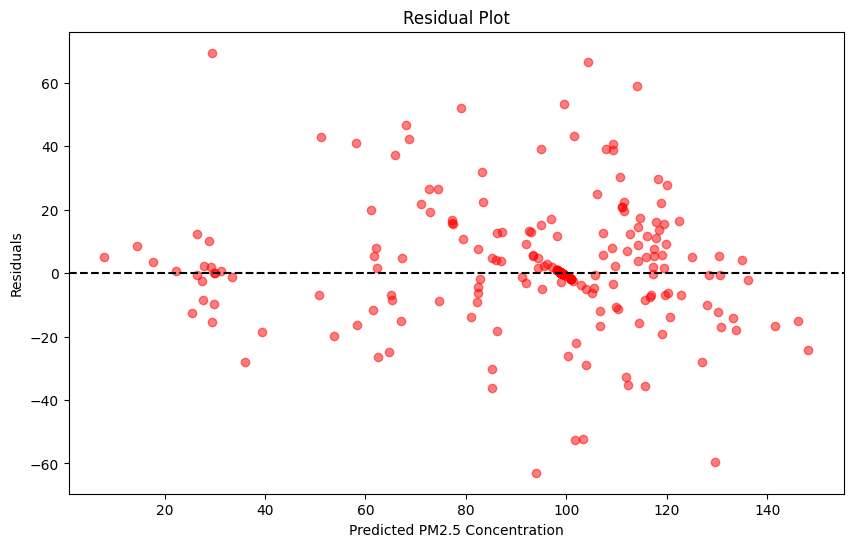

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_rf.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared Score:", r2_test)

# Plotting with different colors for actual and predicted
plt.figure(figsize=(10, 6))

# Plotting actual values in green
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')

# Plotting predicted values in blue
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')

plt.xlabel('Actual PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.title('Random Forest Regression (Testing Set)')
plt.legend()
plt.show()

# Plotting the Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted PM2.5 Concentration')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


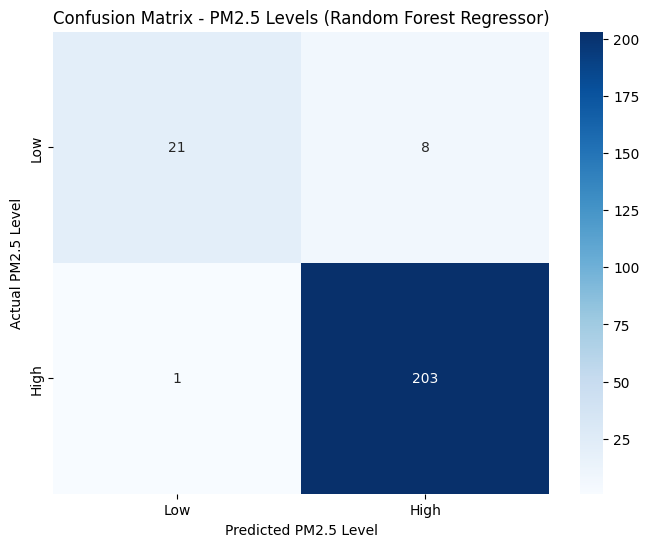

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Extracting datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.drop(columns=['date'], inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf.predict(X_test)

# Convert predictions to binary classes based on a threshold (e.g., 50)
y_pred_binary = np.where(y_pred_rf > 50, 1, 0)
y_test_binary = np.where(y_test > 50, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted PM2.5 Level')
plt.ylabel('Actual PM2.5 Level')
plt.title('Confusion Matrix - PM2.5 Levels (Random Forest Regressor)')
plt.show()


Mean Squared Error (MSE): 398.30807206181663
Mean Absolute Error (MAE): 14.119973418088158
R-squared Score: 0.6003513835858052


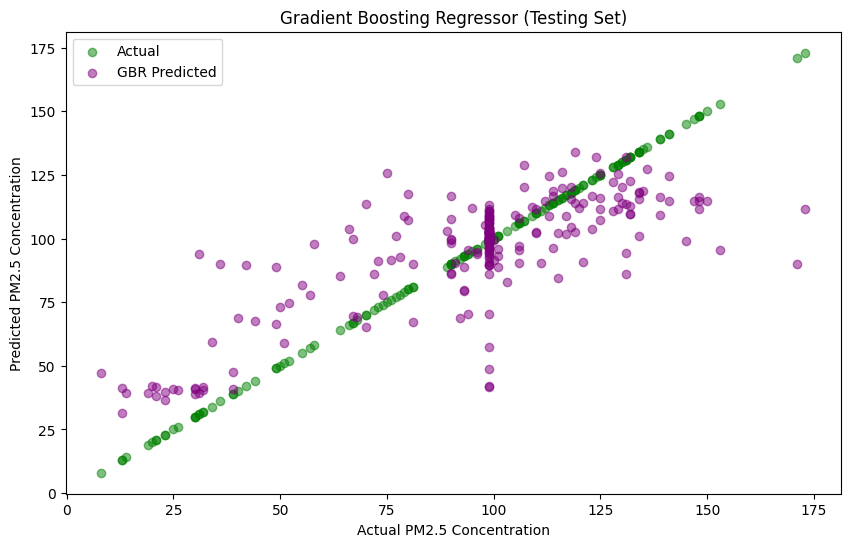

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Extracting datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.drop(columns=['date'], inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gbr = gbr.predict(X_test)

# Evaluate the Gradient Boosting Regressor model on the testing set
mse_test_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_test_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_test_gbr = r2_score(y_test, y_pred_gbr)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse_test_gbr)
print("Mean Absolute Error (MAE):", mae_test_gbr)
print("R-squared Score:", r2_test_gbr)

# Plotting with different colors for actual and predicted
plt.figure(figsize=(10, 6))

# Plotting actual values in green
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')

# Plotting predicted values in purple for Gradient Boosting Regressor
plt.scatter(y_test, y_pred_gbr, color='purple', alpha=0.5, label='GBR Predicted')

plt.xlabel('Actual PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.title('Gradient Boosting Regressor (Testing Set)')
plt.legend()
plt.show()


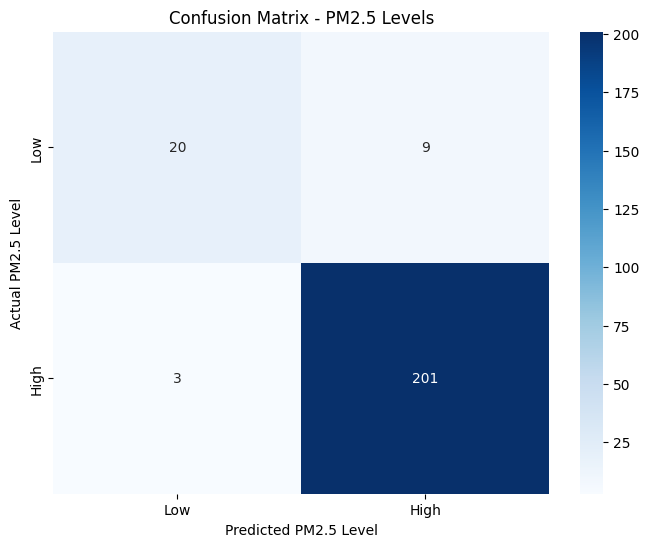

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Extracting datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.drop(columns=['date'], inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gbr = gbr.predict(X_test)

# Convert predictions to binary classes for confusion matrix (optional for visualization)
y_pred_binary = np.where(y_pred_gbr > 50, 1, 0)
y_test_binary = np.where(y_test > 50, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted PM2.5 Level')
plt.ylabel('Actual PM2.5 Level')
plt.title('Confusion Matrix - PM2.5 Levels')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Extracting datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.drop(columns=['date'], inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gbr = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 451.24089182030184
Mean Absolute Error (MAE): 15.485401407623725
R-squared Score: 0.5928952788943767


10-Fold Cross-Validation MAPE Scores: [0.17918835 0.12564238 0.14688164 0.38382009 0.47906288 0.17132985
 0.9657202  0.18105744 0.11289081 0.30017568]
Mean 10-Fold Cross-Validation MAPE: 0.304576933016727
Test Set MAPE: 0.24374589097280977


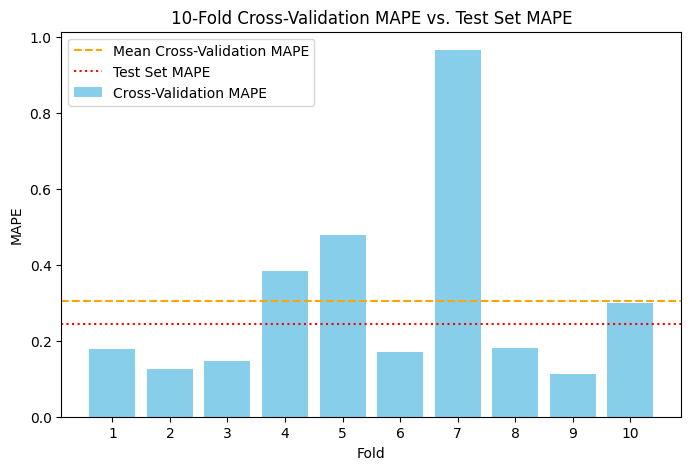

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/jakarta-air-quality.csv')

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['pm25'] = df[' pm25'].str.strip()
df.drop(columns=[' pm25', ' pm10'], axis=1, inplace=True)
df.replace('', np.nan, inplace=True)
df[['pm25']] = df[['pm25']].astype(float)

# Handling missing values in the target variable
df['pm25'].fillna(df['pm25'].median(), inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['pm25'])
y = df['pm25']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define a custom scoring function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring=mape_scorer)

# Train the model on the full training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate MAPE on the test set
mape = mean_absolute_percentage_error(y_test, y_pred)

print("10-Fold Cross-Validation MAPE Scores:", -cv_scores)  # Scores are negated because greater_is_better=False
print("Mean 10-Fold Cross-Validation MAPE:", -np.mean(cv_scores))
print("Test Set MAPE:", mape)

# Create a visualization for the MAPE scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), -cv_scores, color='skyblue', label='Cross-Validation MAPE')
plt.axhline(-np.mean(cv_scores), color='orange', linestyle='--', label='Mean Cross-Validation MAPE')
plt.axhline(mape, color='red', linestyle=':', label='Test Set MAPE')
plt.xlabel('Fold')
plt.ylabel('MAPE')
plt.title('10-Fold Cross-Validation MAPE vs. Test Set MAPE')
plt.xticks(range(1, 11))
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean the data
df = pd.read_csv('/content/AQIData.csv')
df.columns = ['location_id', 'location_name', 'parameter', 'value', 'unit', 'datetime_utc', 'datetime_local', 'timezone', 'latitude', 'longitude', 'country_iso', 'is_mobile', 'is_monitor', 'owner_name', 'provider']
df.drop(['country_iso', 'is_mobile', 'is_monitor'], axis=1, inplace=True)
df = df[df['value'] >= 0]
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['datetime_local'] = pd.to_datetime(df['datetime_local'])
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['location_name'] = df['location_name'].str.strip().str.lower()
df['parameter'] = df['parameter'].str.strip().str.lower()
df['unit'] = df['unit'].str.strip().str.lower()
df['timezone'] = df['timezone'].str.strip().str.lower()
df['owner_name'] = df['owner_name'].str.strip().str.lower()
df['provider'] = df['provider'].str.strip().str.lower()

# Select features and target
X = df[['latitude', 'longitude']]  # Simplified for example purposes
y = df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Display results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(results.head())


Epoch 1/50
21/21 [==============================] - 3s 22ms/step - loss: 2447.0737 - val_loss: 976.8747
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 2438.0657 - val_loss: 965.9584
Epoch 3/50
21/21 [==============================] - 0s 14ms/step - loss: 2423.8169 - val_loss: 947.4419
Epoch 4/50
21/21 [==============================] - 0s 10ms/step - loss: 2399.6335 - val_loss: 918.5381
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 2362.7439 - val_loss: 876.7507
Epoch 6/50
21/21 [==============================] - 0s 11ms/step - loss: 2312.3760 - val_loss: 820.2924
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 2249.0049 - val_loss: 750.7407
Epoch 8/50
21/21 [==============================] - 0s 10ms/step - loss: 2168.7903 - val_loss: 672.5720
Epoch 9/50
21/21 [==============================] - 0s 18ms/step - loss: 2083.9092 - val_loss: 586.5228
Epoch 10/50
21/21 [==============================] - 0s 8ms/step